# *Hierarchical Clustering*

**What is Hierarchical clustering?**

Hierarchical clustering is a method of grouping similar data points into “clusters” in a hierarchical (tree-like) structure. This comes under unsupervised machine learning.

**But, what is considered “similar”?**

The simplest way to to define similarity is by distance; we can use Euclidean distance, Manhattan distance, cosine similarity, etc. 

The "cluster"s similarity can be determined through *Linkage*. 

**There are four types of "Linkage":**
1. **Single Linkage**: 
    Distance between clusters is defined through their closest points. 
2. **Complete linkage**: 
    Distance between clusters is taken as the distance between their furthest points.
3. **Average Linkage**: 
    Distance is the average of all pairwise distances between points in the two clusters
4. **Ward’s method**: 
    Aims to minimize the variance within each cluster.

**Strengths**:
1. *Interpretability*: This method focuses more on interpretability through dendrograms when a hierarchical relationship is expected in the data. Through this, data can be visually inspected to understand relationships among data points and clusters. 
2. *No need to decide the number of clusters beforehand*. We can decide on the number of clusters through adjusting the height of the dendrogram.
3. *Flexibility with Distance Metrics*: The choice of distance metrics can be decided based on the problem’s requirements.

**Weakness**:
1. *Computational Complexity*: It can be more computationally expensive than methods like K-means (more so when we deal with large datasets).
2. *Lack of “Global” Objective*: Unlike K-means, hierarchical methods don’t necessarily optimization a global objective function across all data points.
3. *Sensitive to Noise and Outliers*: In Agglomerative method, the merging process can result in outliers being merged, causing a distorted final cluster formation.
   
**When does Hierarchical Clustering Perform Well?**
1. *For relatively small datasets:*
    since Hierarchical clustering often has higher computational cost, it is more suitable when $n$, the number of data points, is not extremely large.
2. *When the Data has a Hierarchical Structure:*
   Biological, taxonomical, or gene-expression datasets. 
3. *Interpretability is a priority.*

**When does it Fail?**
1. *Large Data sets*
2. *High Dimensional data, (the curse of dimensionality)*
3. *Presence of Noise or outliers*
4. *Non-Hierarchical Data structure*

**Ethical concerns:**

Some of the major use-cases of this algorithm is oriented towards the grouping customers. Be it in the “Retail Industry” with customer segmentation, the “Healthcare Industry” with patient segmentation and genomics, the “Finance Industry” with credit risk analysis, and so on. 

With this algorithm being extremely sensitive to outliers, it is prone to data bias, which would be detrimental to the people it represents. This bias could lead to misuse, discrimination and breach of trust.

**Comparison between Hierarchical Clustering, K-Means, and DBSCAN**
| Aspect | Hierarchical | K-Means | DBSCAN |
| --- | --- | --- | --- |
| Idea | Merge/Split clusters to form a tree | Iteratively refine K centroids | Grow clusters from dense regions in data |
| Number of clusters | determined after the fact | Must specify K beforehand | Discovered automatically based on density |
| Scalability | Generally less scalable | More scalable, efficient for large datasets | depends on chosen parameters |
| Shape of Clusters | Flexible, depending on linkage | Spherical  | Arbitrary |
| Outliers Handling | No explicit outlier handling (sensitive) | Sensitive to outliers | Outliers recognized and labeled as noise by default |
| Interpretability | High | Moderate | Moderate |
| Key Parameters | Linkage, distance metric | K + distance  | neighborhood radius, minimum cluster size. |
| Computational Complexity | $O(n^2logn)$ or $O(n^3)$ | $O(n \times k \times d \times T)$ | $O(nlogn) |$

# Algorithm:
1.  Preprocessing: 
    -   Normalize the data.
2.  Choose a Distance Metric  (Euclidean distance, manhattan ...)
3.  Chose a Linkage Criterion
    -   Single linkage, complete linkage, average linkage, or Ward's.
4.  Perform the Clustring:
    -   Agglomerative approach:
        -   Start with each data point in its own cluster.
        -   Calculate distane between all clusters.
        -   Marge the two clusters that are the closest.
        -   Repeat until a single cluster remains or exit criteria is met.
5.  Plot the "Dendrogram"
6.  Decide on the Number of Clusters

---

## **Code:**

Sample Clustering

In [2]:
# Required liberaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# Generate Synthetic Data (Used AI to create the code):
X,_ = make_blobs(
    n_samples=50,
    centers = 3,
    cluster_std = 1.0,
    random_state=2001
)

In [9]:
X[:3]

array([[ 0.93764733, -1.0878694 ],
       [ 9.1296306 ,  8.75856557],
       [ 9.29521957,  9.11601169]])

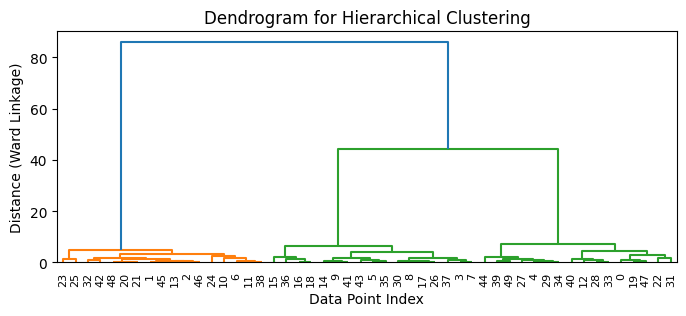

In [15]:
# Perform Hierarchical Cluster
Z = linkage(X, method = 'ward')

# creating the Dendrogram
plt.figure(figsize = (8,3))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Point Index')
plt.ylabel('Distance (Ward Linkage)')
plt.show()

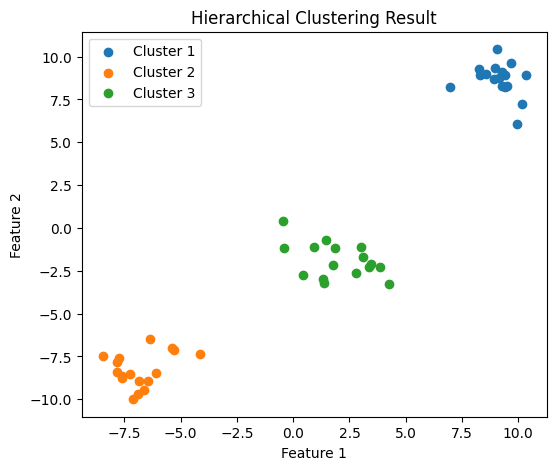

In [16]:
# Deciding on the number of clusters:
n = 3
labels = fcluster(Z, t=n, criterion='maxclust')
plt.figure(figsize=(6, 5))
for cluster_id in np.unique(labels):
    # Extract the points in this cluster
    cluster_points = X[labels == cluster_id]
    plt.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        label=f'Cluster {cluster_id}'
    )

plt.title('Hierarchical Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

---

Clustering using Real world Data

In [17]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, dendrogram

In [29]:
loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [31]:
percent_missing =round(100*(loan_data.isnull().sum())/len(loan_data),2)
percent_missing

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [32]:
cleaned_data = loan_data.drop(['purpose', 'not.fully.paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [34]:
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
    
        df = df[(df[str(col)] >= lower_bound) & 

            (df[str(col)] <= upper_bound)]
    return df
without_outliers = remove_outliers(cleaned_data)

In [36]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9319, 12)

In [43]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")

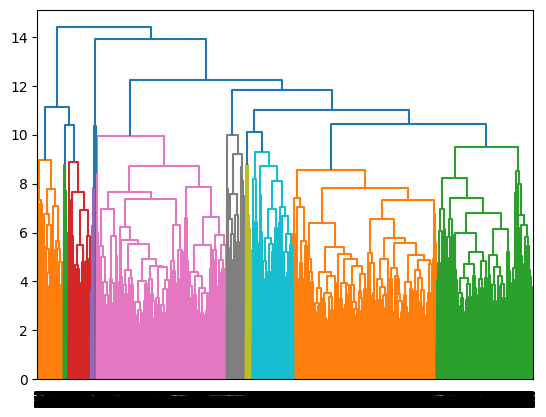

In [38]:
dendrogram(complete_clustering)
plt.show()

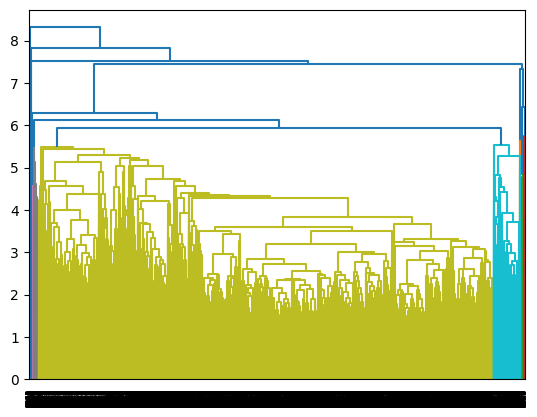

In [40]:
dendrogram(average_clustering)
plt.show()

---

**A new use case:**

I assume that you have had the difficult task of sifting through large amounts of research papers, going line by line through list of results put out by the search engine. Even if you know that ever link has some relevant data in it, searching through the list is a daunting task. 

Now, image if you had a snapshot of all the results in a single graph, showing you how closely related each link is to the other.
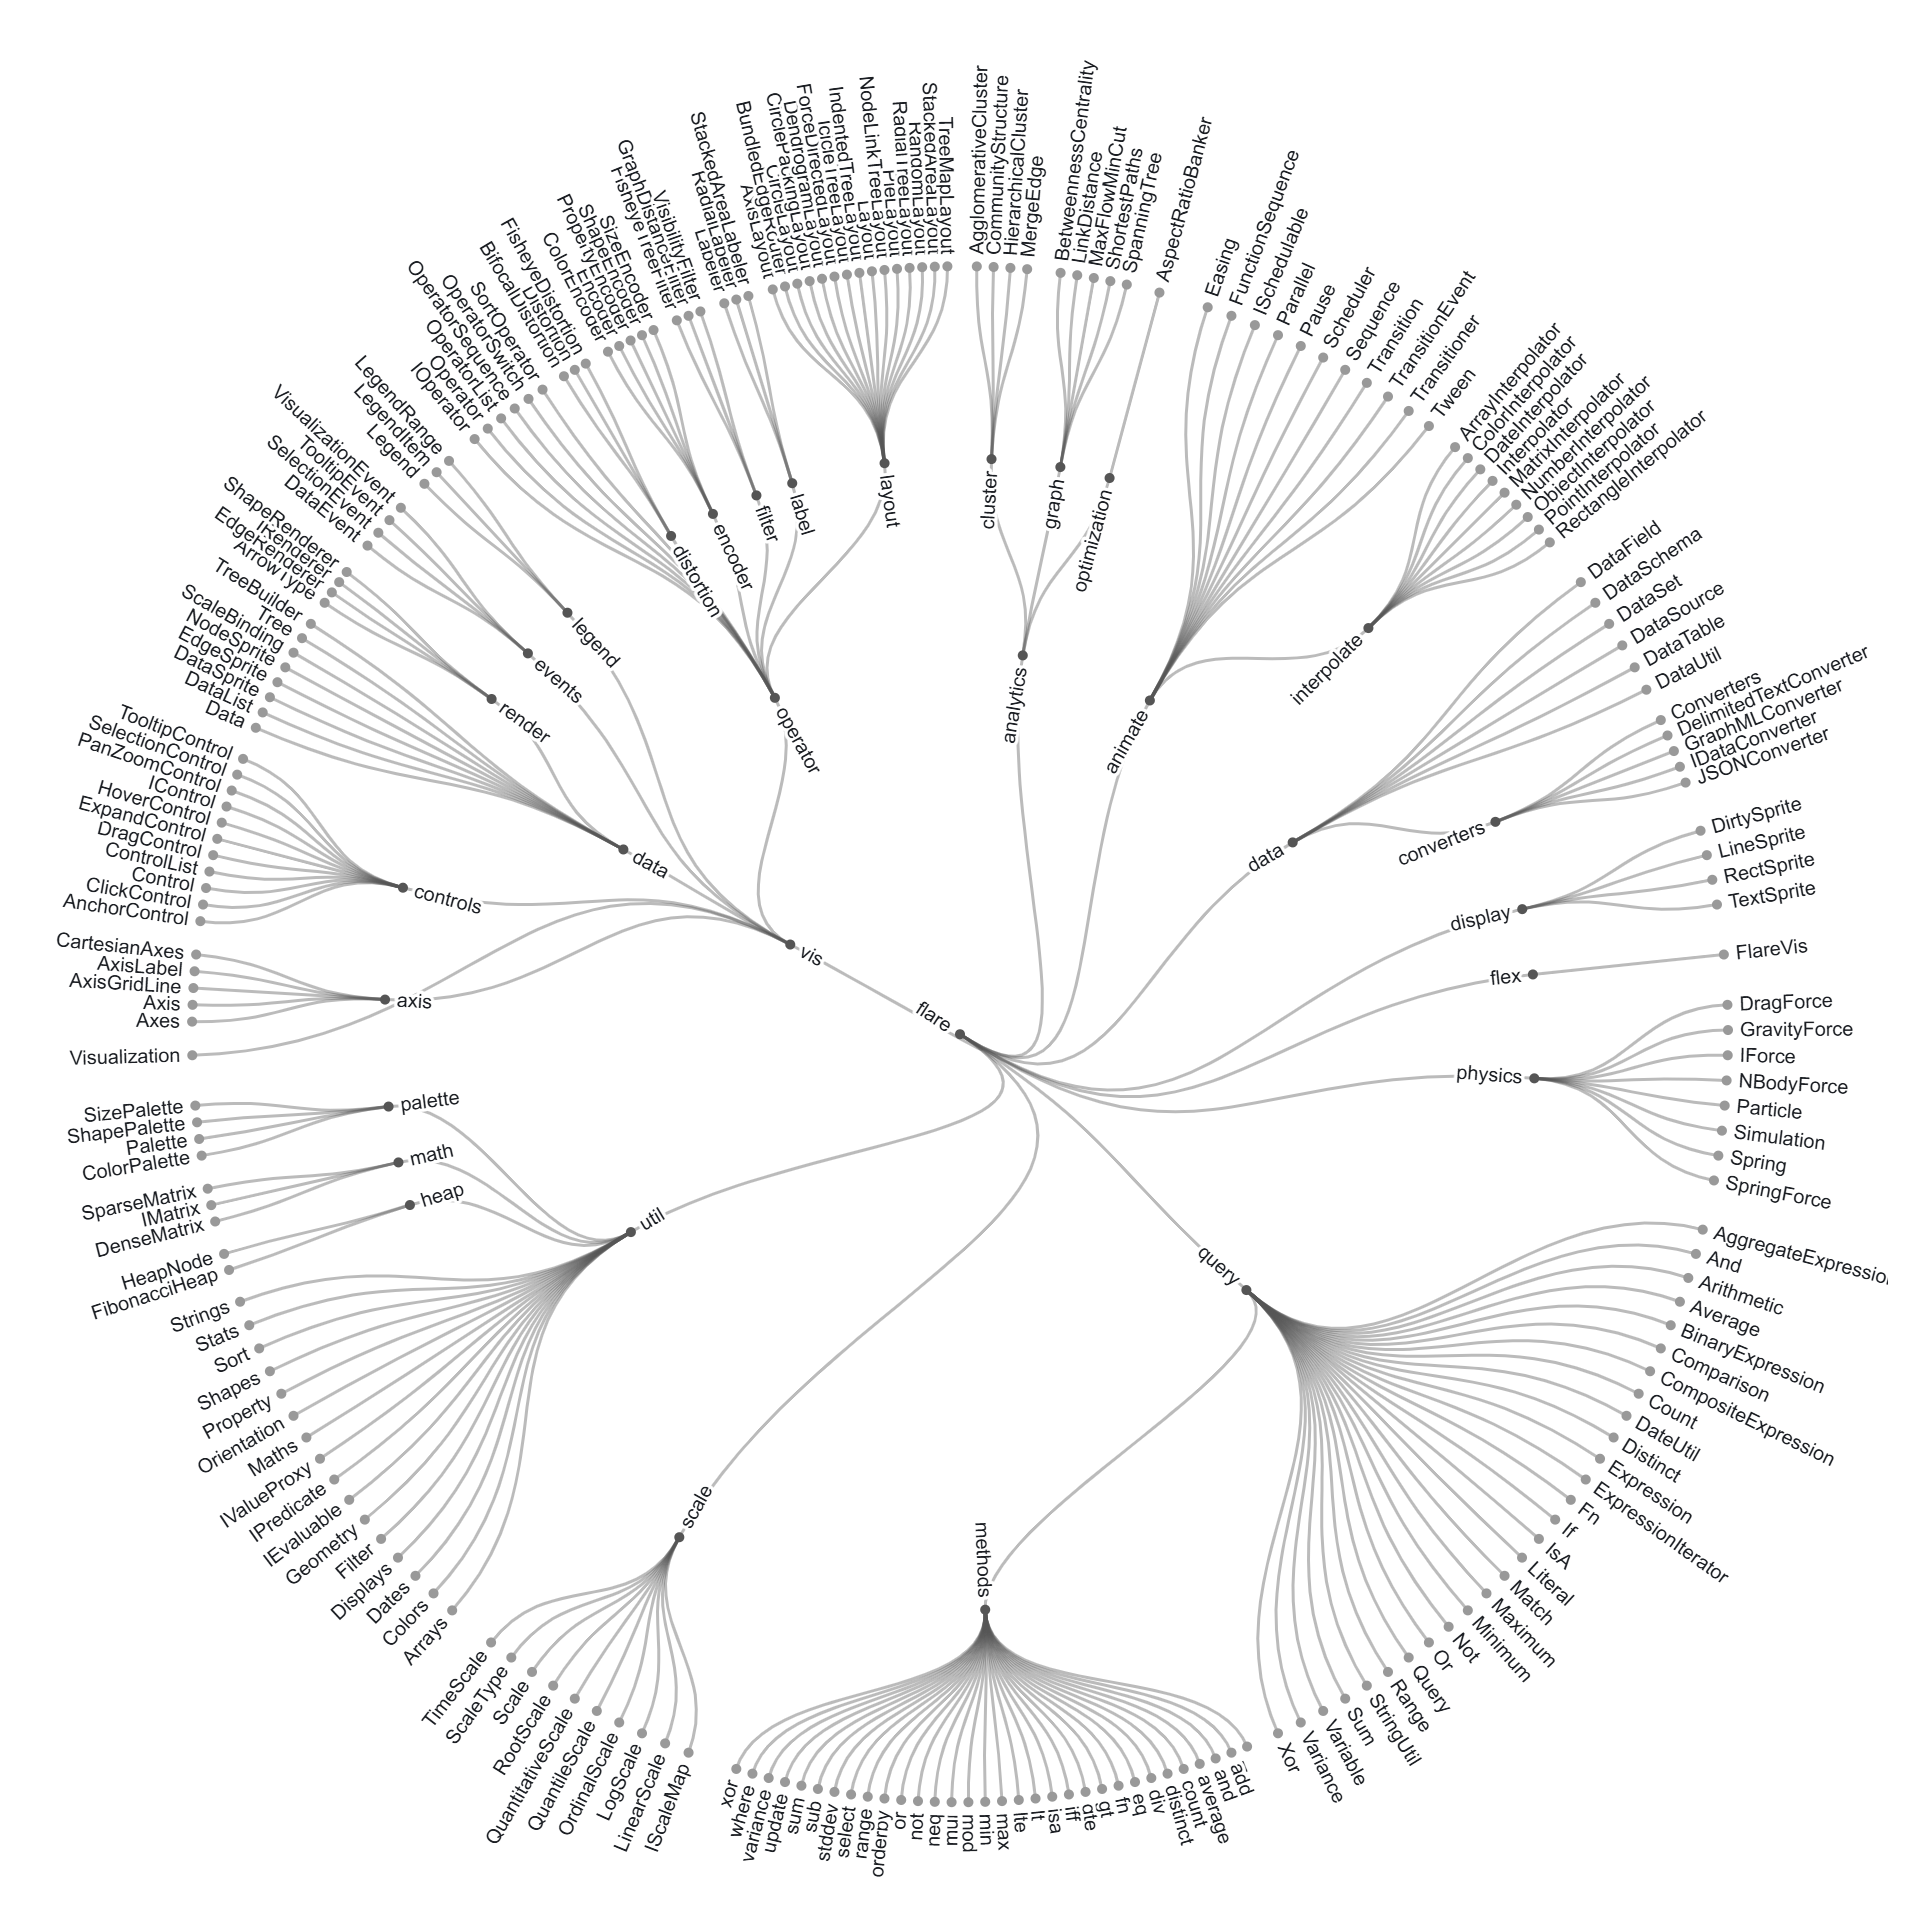
An interactive visual like this would help narrow down the scope of your search, instead of just going with the top results.